# Hyperbolic plane $\mathbb{H}^2$

*This worksheet illustrates some features of [SageManifolds](http://sagemanifolds.obspm.fr/) (v0.9) on computations regarding the hyperbolic plane.*

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [1]:
%display latex

We also define a viewer for 3D plots:

In [2]:
viewer3D = 'tachyon' # must be 'jmol', 'tachyon' or None (default)

We declare $\mathbb{H}^2$ as a 2-dimensional differentiable manifold:

In [3]:
H2 = Manifold(2, 'H2', latex_name=r'\mathbb{H}^2', start_index=1)
print H2
H2

2-dimensional differentiable manifold H2


2-dimensional differentiable manifold H2

We shall introduce charts on $\mathbb{H}^2$ that are related to various models of the hyperbolic plane as submanifolds of $\mathbb{R}^3$. Therefore, we start by declaring $\mathbb{R}^3$ as a 3-dimensional manifold equiped with a global chart: the chart of Cartesian coordinates $(X,Y,Z)$:

In [4]:
R3 = Manifold(3, 'R3', latex_name=r'\mathbb{R}^3', start_index=1)
X3.<X,Y,Z> = R3.chart()
X3

Chart (R3, (X, Y, Z))

## Hyperboloid model

The first chart we introduce is related to the **hyperboloid model of $\mathbb{H}^2$**, namely to the representation of $\mathbb{H}^2$ as the upper sheet ($Z>0$) of the hyperboloid of two sheets defined in $\mathbb{R}^3$ by the equation $X^2 + Y^2 - Z^2 = -1$:

In [5]:
X_hyp.<X,Y> = H2.chart()
X_hyp

Chart (H2, (X, Y))

The corresponding embedding of $\mathbb{H}^2$ in $\mathbb{R}^3$ is

In [6]:
Phi1 = H2.diff_map(R3, [X, Y, sqrt(1+X^2+Y^2)], name='Phi_1', latex_name=r'\Phi_1')
Phi1.display()

Phi_1: H2 --> R3
   (X, Y) |--> (X, Y, Z) = (X, Y, sqrt(X^2 + Y^2 + 1))

By plotting the chart $\left(\mathbb{H}^2,(X,Y)\right)$ in terms of the Cartesian coordinates of $\mathbb{R}^3$, we get a graphical view of $\Phi_1(\mathbb{H}^2)$:

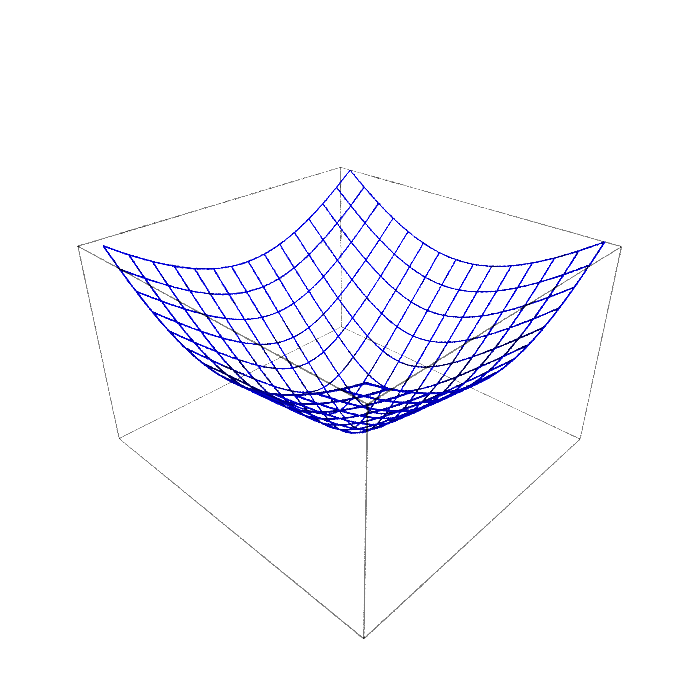

In [7]:
show(X_hyp.plot(X3, mapping=Phi1, nb_values=15, color='blue'), aspect_ratio=1, 
     viewer=viewer3D, figsize=7)

A second chart is obtained from the polar coordinates $(r,\varphi)$ associated with $(X,Y)$. Contrary to $(X,Y)$, the polar chart is not defined on the whole $\mathbb{H}^2$, but on the complement $U$ of the segment $\{Y=0, x\geq 0\}$: 

In [8]:
U = H2.open_subset('U', coord_def={X_hyp: (Y!=0, X<0)})
print U

Open subset U of the 2-dimensional differentiable manifold H2


Note that (y!=0, x<0) stands for $y\not=0$ OR $x<0$; the condition $y\not=0$ AND $x<0$ would have been written [y!=0, x<0] instead.

In [9]:
X_pol.<r,ph> = U.chart(r'r:(0,+oo) ph:(0,2*pi):\varphi')
X_pol

Chart (U, (r, ph))

In [10]:
X_pol.coord_range()

r: (0, +oo); ph: (0, 2*pi)

We specify the transition map between the charts $\left(U,(r,\varphi)\right)$ and $\left(\mathbb{H}^2,(X,Y)\right)$ as $X=r\cos\varphi$, $Y=r\sin\varphi$:

In [11]:
pol_to_hyp = X_pol.transition_map(X_hyp, [r*cos(ph), r*sin(ph)])
pol_to_hyp

Change of coordinates from Chart (U, (r, ph)) to Chart (U, (X, Y))

In [12]:
pol_to_hyp.display()

X = r*cos(ph)
Y = r*sin(ph)

In [13]:
pol_to_hyp.set_inverse(sqrt(X^2+Y^2), atan2(Y, X)) 

Check of the inverse coordinate transformation:
   r == r
   ph == arctan2(r*sin(ph), r*cos(ph))
   X == X
   Y == Y


In [14]:
pol_to_hyp.inverse().display()

r = sqrt(X^2 + Y^2)
ph = arctan2(Y, X)

The restriction of the embedding $\Phi_1$ to $U$ has then two coordinate expressions:

In [15]:
Phi1.restrict(U).display()

Phi_1: U --> R3
   (X, Y) |--> (X, Y, Z) = (X, Y, sqrt(X^2 + Y^2 + 1))
   (r, ph) |--> (X, Y, Z) = (r*cos(ph), r*sin(ph), sqrt(r^2 + 1))

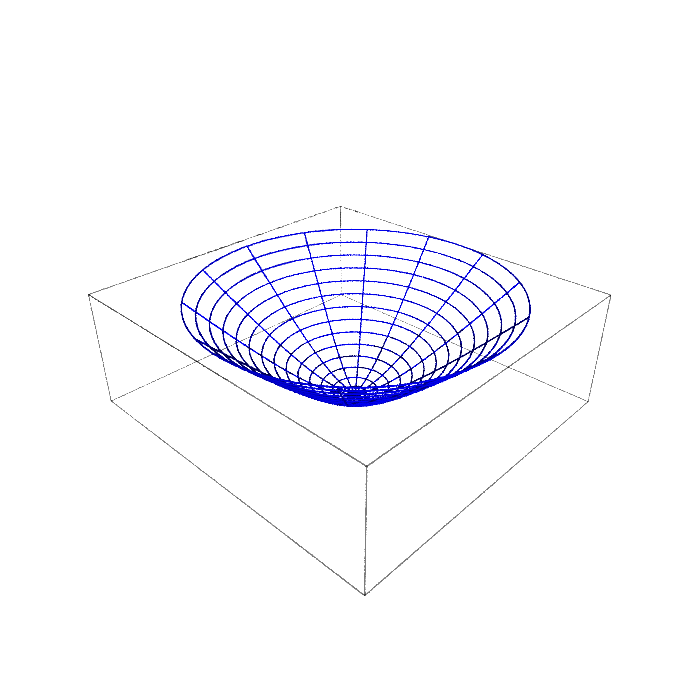

In [16]:
graph_hyp = X_pol.plot(X3, mapping=Phi1.restrict(U), nb_values=15, ranges={r: (0,3)}, 
                       color='blue')
show(graph_hyp, aspect_ratio=1, viewer=viewer3D, figsize=7)

In [17]:
Phi1._coord_expression

{(Chart (H2, (X, Y)),
  Chart (R3, (X, Y, Z))): Coordinate functions (X, Y, sqrt(X^2 + Y^2 + 1)) on the Chart (H2, (X, Y))}

## Metric and curvature

The metric on $\mathbb{H}^2$ is that induced by the Minkowksy metric on $\mathbb{R}^3$: 
$$ \eta = \mathrm{d}X\otimes\mathrm{d}X + \mathrm{d}Y\otimes\mathrm{d}Y
  - \mathrm{d}Z\otimes\mathrm{d}Z $$

In [18]:
eta = R3.lorentzian_metric('eta', latex_name=r'\eta')
eta[1,1] = 1 ; eta[2,2] = 1 ; eta[3,3] = -1
eta.display()

eta = dX*dX + dY*dY - dZ*dZ

In [19]:
g = H2.metric('g')
g.set( Phi1.pullback(eta) )
g.display() 

g = (Y^2 + 1)/(X^2 + Y^2 + 1) dX*dX - X*Y/(X^2 + Y^2 + 1) dX*dY - X*Y/(X^2 + Y^2 + 1) dY*dX + (X^2 + 1)/(X^2 + Y^2 + 1) dY*dY

The expression of the metric tensor in terms of the polar coordinates is

In [20]:
g.display(X_pol.frame(), X_pol)

g = 1/(r^2 + 1) dr*dr + r^2 dph*dph

The Riemann curvature tensor associated with $g$ is

In [21]:
Riem = g.riemann()
print Riem

Tensor field Riem(g) of type (1,3) on the 2-dimensional differentiable manifold H2


In [22]:
Riem.display(X_pol.frame(), X_pol)

Riem(g) = -r^2 d/dr*dph*dr*dph + r^2 d/dr*dph*dph*dr + 1/(r^2 + 1) d/dph*dr*dr*dph - 1/(r^2 + 1) d/dph*dr*dph*dr

The Ricci tensor and the Ricci scalar:

In [23]:
Ric = g.ricci()
print Ric

Field of symmetric bilinear forms Ric(g) on the 2-dimensional differentiable manifold H2


In [24]:
Ric.display(X_pol.frame(), X_pol)

Ric(g) = -1/(r^2 + 1) dr*dr - r^2 dph*dph

In [25]:
Rscal = g.ricci_scalar()
print Rscal

Scalar field r(g) on the 2-dimensional differentiable manifold H2


In [26]:
Rscal.display()

r(g): H2 --> R
   (X, Y) |--> -2
on U: (r, ph) |--> -2

Hence we recover the fact that $(\mathbb{H}^2,g)$ is a space of **constant negative curvature**.

In dimension 2, the Riemann curvature tensor is entirely determined by the Ricci scalar $R$ according to

$$R^i_{\ \, jlk} = \frac{R}{2} \left( \delta^i_{\ \, k} g_{jl} - \delta^i_{\ \, l} g_{jk} \right)$$

Let us check this formula here, under the form $R^i_{\ \, jlk} = -R g_{j[k} \delta^i_{\ \, l]}$:

In [27]:
delta = H2.tangent_identity_field()
Riem == - Rscal*(g*delta).antisymmetrize(2,3)  # 2,3 = last positions of the type-(1,3) tensor g*delta 

True

Similarly the relation $\mathrm{Ric} = (R/2)\; g$ must hold:

In [28]:
Ric == (Rscal/2)*g

True

## Poincaré disk model

The Poincaré disk model of $\mathbb{H}^2$ is obtained by stereographic projection from the point $S=(0,0,-1)$ of the hyperboloid model to the plane $Z=0$. The radial coordinate $R$ of the image of a point of polar coordinate $(r,\varphi)$ is
$$ R = \frac{r}{1+\sqrt{1+r^2}}.$$
Hence we define the Poincaré disk chart on $\mathbb{H}^2$ by

In [29]:
X_Pdisk.<R,ph> = U.chart(r'R:(0,1) ph:(0,2*pi):\varphi')
X_Pdisk

Chart (U, (R, ph))

In [30]:
X_Pdisk.coord_range()

R: (0, 1); ph: (0, 2*pi)

and relate it to the hyperboloid polar chart by

In [31]:
pol_to_Pdisk = X_pol.transition_map(X_Pdisk, [r/(1+sqrt(1+r^2)), ph])
pol_to_Pdisk

Change of coordinates from Chart (U, (r, ph)) to Chart (U, (R, ph))

In [32]:
pol_to_Pdisk.display()

R = r/(sqrt(r^2 + 1) + 1)
ph = ph

In [33]:
pol_to_Pdisk.set_inverse(2*R/(1-R^2), ph)
pol_to_Pdisk.inverse().display()

Check of the inverse coordinate transformation:
   r == r
   ph == ph
   R == R
   ph == ph


r = -2*R/(R^2 - 1)
ph = ph

A view of the Poincaré disk chart via the embedding $\Phi_1$:

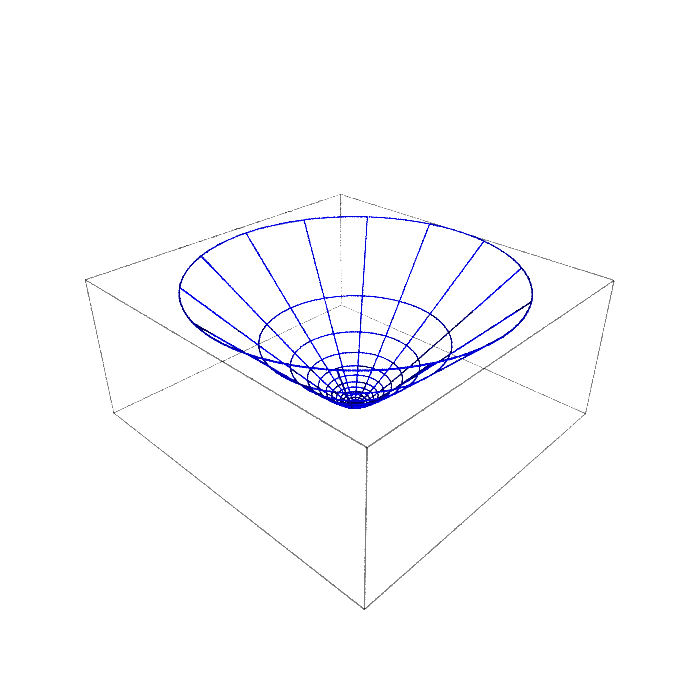

In [34]:
show(X_Pdisk.plot(X3, mapping=Phi1.restrict(U), ranges={R: (0,0.9)}, color='blue',
                  nb_values=15), aspect_ratio=1, viewer=viewer3D, figsize=7)

The expression of the metric tensor in terms of coordinates $(R,\varphi)$:

In [35]:
g.display(X_Pdisk.frame(), X_Pdisk)

g = 4/(R^4 - 2*R^2 + 1) dR*dR + 4*R^2/(R^4 - 2*R^2 + 1) dph*dph

We may factorize each metric component:

In [36]:
for i in [1,2]:
    g[X_Pdisk.frame(), i, i, X_Pdisk].factor()
g.display(X_Pdisk.frame(), X_Pdisk)

g = 4/((R + 1)^2*(R - 1)^2) dR*dR + 4*R^2/((R + 1)^2*(R - 1)^2) dph*dph

### Cartesian coordinates on the Poincaré disk

Let us introduce Cartesian coordinates $(u,v)$ on the Poincaré disk; since the latter has a unit radius, this amounts to define the following chart on $\mathbb{H}^2$:

In [37]:
X_Pdisk_cart.<u,v> = H2.chart('u:(-1,1) v:(-1,1)')
X_Pdisk_cart.add_restrictions(u^2+v^2 < 1)
X_Pdisk_cart

Chart (H2, (u, v))

On $U$, the Cartesian coordinates $(u,v)$ are related to the polar coordinates $(R,\varphi)$ by the standard formulas:

In [38]:
Pdisk_to_Pdisk_cart = X_Pdisk.transition_map(X_Pdisk_cart, [R*cos(ph), R*sin(ph)])
Pdisk_to_Pdisk_cart

Change of coordinates from Chart (U, (R, ph)) to Chart (U, (u, v))

In [39]:
Pdisk_to_Pdisk_cart.display()

u = R*cos(ph)
v = R*sin(ph)

In [40]:
Pdisk_to_Pdisk_cart.set_inverse(sqrt(u^2+v^2), atan2(v, u)) 
Pdisk_to_Pdisk_cart.inverse().display()

Check of the inverse coordinate transformation:
   R == R
   ph == arctan2(R*sin(ph), R*cos(ph))
   u == u
   v == v


R = sqrt(u^2 + v^2)
ph = arctan2(v, u)

The embedding of $\mathbb{H}^2$ in $\mathbb{R}^3$ associated with the Poincaré disk model is naturally defined as

In [41]:
Phi2 = H2.diff_map(R3, {(X_Pdisk_cart, X3): [u, v, 0]},
                   name='Phi_2', latex_name=r'\Phi_2')
Phi2.display()

Phi_2: H2 --> R3
   (u, v) |--> (X, Y, Z) = (u, v, 0)

Let us use it to draw the Poincaré disk in $\mathbb{R}^3$:

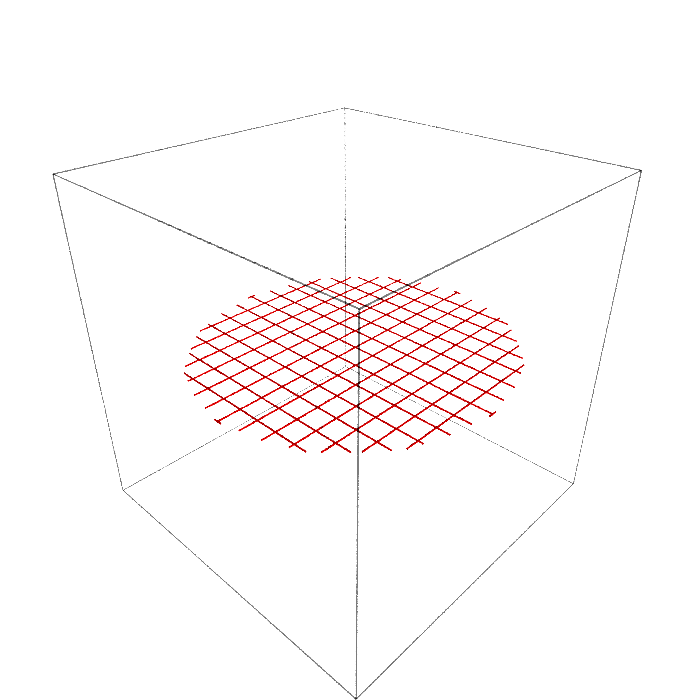

In [42]:
graph_disk_uv = X_Pdisk_cart.plot(X3, mapping=Phi2, nb_values=15)
show(graph_disk_uv, viewer=viewer3D, figsize=7)

On $U$, the change of coordinates $(r,\varphi) \rightarrow (u,v)$ is obtained by combining the changes $(r,\varphi) \rightarrow (R,\varphi)$ and $(R,\varphi) \rightarrow (u,v)$:

In [43]:
pol_to_Pdisk_cart = Pdisk_to_Pdisk_cart * pol_to_Pdisk
pol_to_Pdisk_cart

Change of coordinates from Chart (U, (r, ph)) to Chart (U, (u, v))

In [44]:
pol_to_Pdisk_cart.display()

u = r*cos(ph)/(sqrt(r^2 + 1) + 1)
v = r*sin(ph)/(sqrt(r^2 + 1) + 1)

Still on $U$, the change of coordinates $(X,Y) \rightarrow (u,v)$ is obtained by combining the changes $(X,Y) \rightarrow (r,\varphi)$ with $(r,\varphi) \rightarrow (u,v)$:

In [45]:
hyp_to_Pdisk_cart_U = pol_to_Pdisk_cart * pol_to_hyp.inverse()
hyp_to_Pdisk_cart_U

Change of coordinates from Chart (U, (X, Y)) to Chart (U, (u, v))

In [46]:
hyp_to_Pdisk_cart_U.display()

u = X/(sqrt(X^2 + Y^2 + 1) + 1)
v = Y/(sqrt(X^2 + Y^2 + 1) + 1)

We use the above expression to extend the change of coordinates $(X,Y) \rightarrow (u,v)$ from $U$ to the whole manifold $\mathbb{H}^2$:

In [47]:
hyp_to_Pdisk_cart = X_hyp.transition_map(X_Pdisk_cart, hyp_to_Pdisk_cart_U(X,Y))
hyp_to_Pdisk_cart

Change of coordinates from Chart (H2, (X, Y)) to Chart (H2, (u, v))

In [48]:
hyp_to_Pdisk_cart.display()

u = X/(sqrt(X^2 + Y^2 + 1) + 1)
v = Y/(sqrt(X^2 + Y^2 + 1) + 1)

In [49]:
hyp_to_Pdisk_cart.set_inverse(2*u/(1-u^2-v^2), 2*v/(1-u^2-v^2))
hyp_to_Pdisk_cart.inverse().display()

Check of the inverse coordinate transformation:
   X == X
   Y == Y
   u == -2*u*abs(u^2 + v^2 - 1)/(u^4 + 2*u^2*v^2 + v^4 + (u^2 + v^2 - 1)*abs(u^2 + v^2 - 1) - 1)
   v == -2*v*abs(u^2 + v^2 - 1)/(u^4 + 2*u^2*v^2 + v^4 + (u^2 + v^2 - 1)*abs(u^2 + v^2 - 1) - 1)


X = -2*u/(u^2 + v^2 - 1)
Y = -2*v/(u^2 + v^2 - 1)

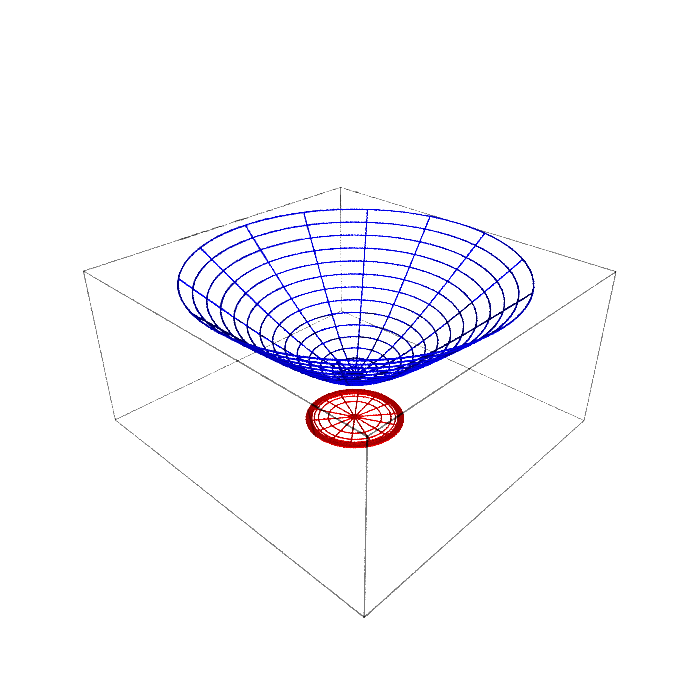

In [50]:
graph_Pdisk = X_pol.plot(X3, mapping=Phi2.restrict(U), ranges={r: (0, 20)}, nb_values=15, 
                         label_axes=False)
show(graph_hyp + graph_Pdisk, aspect_ratio=1, viewer=viewer3D, figsize=7)

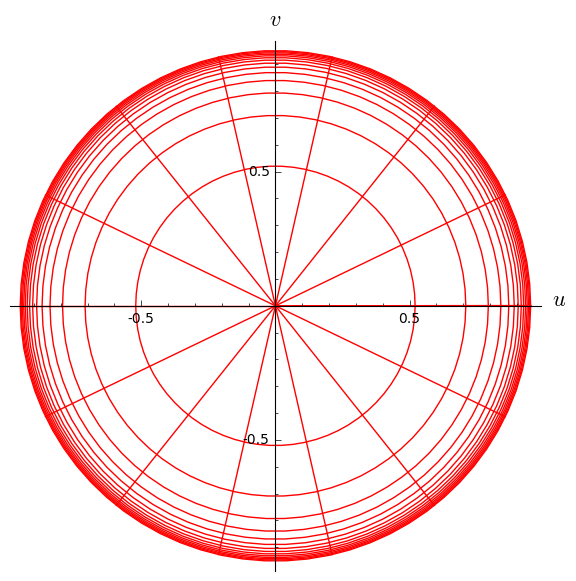

In [51]:
X_pol.plot(X_Pdisk_cart, ranges={r: (0, 20)}, nb_values=15)

### Metric tensor in Poincaré disk coordinates $(u,v)$

From now on, we are using the Poincaré disk chart $(\mathbb{H}^2,(u,v))$ as the default one on $\mathbb{H}^2$:

In [52]:
H2.set_default_chart(X_Pdisk_cart)
H2.set_default_frame(X_Pdisk_cart.frame())

In [53]:
g.display(X_hyp.frame())

g = (u^4 + v^4 + 2*(u^2 + 1)*v^2 - 2*u^2 + 1)/(u^4 + v^4 + 2*(u^2 + 1)*v^2 + 2*u^2 + 1) dX*dX - 4*u*v/(u^4 + v^4 + 2*(u^2 + 1)*v^2 + 2*u^2 + 1) dX*dY - 4*u*v/(u^4 + v^4 + 2*(u^2 + 1)*v^2 + 2*u^2 + 1) dY*dX + (u^4 + v^4 + 2*(u^2 - 1)*v^2 + 2*u^2 + 1)/(u^4 + v^4 + 2*(u^2 + 1)*v^2 + 2*u^2 + 1) dY*dY

In [54]:
g.display()

g = 4/(u^4 + v^4 + 2*(u^2 - 1)*v^2 - 2*u^2 + 1) du*du + 4/(u^4 + v^4 + 2*(u^2 - 1)*v^2 - 2*u^2 + 1) dv*dv

In [55]:
g[1,1].factor() ; g[2,2].factor()
g.display()

g = 4/(u^2 + v^2 - 1)^2 du*du + 4/(u^2 + v^2 - 1)^2 dv*dv

## Hemispherical model

The **hemispherical model of $\mathbb{H}^2$** is obtained by the inverse stereographic projection from the point $S = (0,0,-1)$ of the Poincaré disk to the unit sphere $X^2+Y^2+Z^2=1$. This induces a spherical coordinate chart on $U$:

In [56]:
X_spher.<th,ph> = U.chart(r'th:(0,pi/2):\theta ph:(0,2*pi):\varphi')
X_spher

Chart (U, (th, ph))

From the stereographic projection from $S$, we obtain that
\begin{equation}
\sin\theta = \frac{2R}{1+R^2}
\end{equation}
Hence the transition map:

In [57]:
Pdisk_to_spher = X_Pdisk.transition_map(X_spher, [arcsin(2*R/(1+R^2)), ph])
Pdisk_to_spher

Change of coordinates from Chart (U, (R, ph)) to Chart (U, (th, ph))

In [58]:
Pdisk_to_spher.display()

th = arcsin(2*R/(R^2 + 1))
ph = ph

In [59]:
Pdisk_to_spher.set_inverse(sin(th)/(1+cos(th)), ph)
Pdisk_to_spher.inverse().display()

Check of the inverse coordinate transformation:
   R == R
   ph == ph
   th == th
   ph == ph


R = sin(th)/(cos(th) + 1)
ph = ph

In the spherical coordinates $(\theta,\varphi)$, the metric takes the following form:

In [60]:
g.display(X_spher.frame(), X_spher)

g = cos(th)^(-2) dth*dth + sin(th)^2/cos(th)^2 dph*dph

The embedding of $\mathbb{H}^2$ in $\mathbb{R}^3$ associated with the hemispherical model is naturally:

In [61]:
Phi3 = H2.diff_map(R3, {(X_spher, X3): [sin(th)*cos(ph), sin(th)*sin(ph), cos(th)]},
                   name='Phi_3', latex_name=r'\Phi_3')
Phi3.display()

Phi_3: H2 --> R3
on U: (R, ph) |--> (X, Y, Z) = (2*R*cos(ph)/(R^2 + 1), 2*R*sin(ph)/(R^2 + 1), -(R^2 - 1)/(R^2 + 1))
on U: (th, ph) |--> (X, Y, Z) = (cos(ph)*sin(th), sin(ph)*sin(th), cos(th))

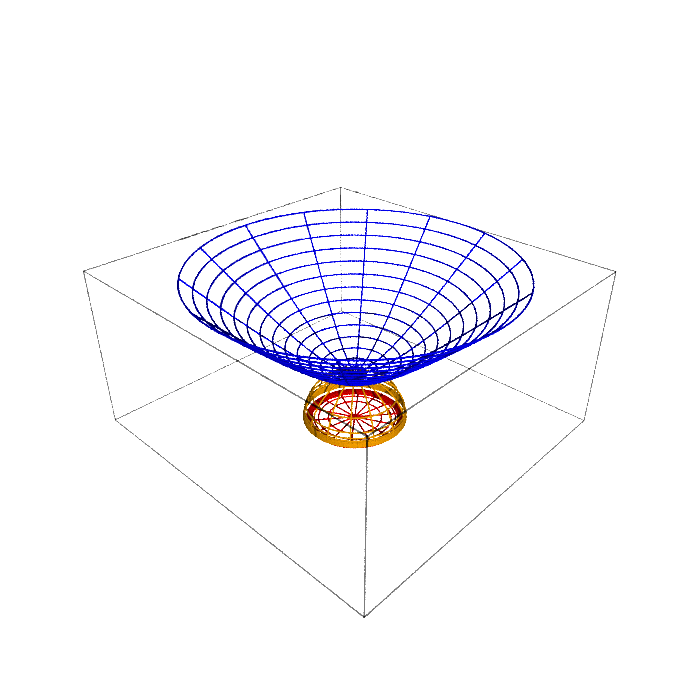

In [62]:
graph_spher = X_pol.plot(X3, mapping=Phi3, ranges={r: (0, 20)}, nb_values=15, color='orange', 
                         label_axes=False)
show(graph_hyp + graph_Pdisk + graph_spher, aspect_ratio=1, viewer=viewer3D, figsize=7)

## Poincaré half-plane model

The **Poincaré half-plane model of $\mathbb{H}^2$** is obtained by stereographic projection from the point $W=(-1,0,0)$ of the hemispherical model to the plane $X=1$. This induces a new coordinate chart on $\mathbb{H}^2$ by setting $(x,y)=(Y,Z)$ in the plane $X=1$:

In [63]:
X_hplane.<x,y> = H2.chart('x y:(0,+oo)')
X_hplane

Chart (H2, (x, y))

The coordinate transformation $(\theta,\varphi)\rightarrow (x,y)$ is easily deduced from the stereographic projection from the point $W$:

In [64]:
spher_to_hplane = X_spher.transition_map(X_hplane, [2*sin(th)*sin(ph)/(1+sin(th)*cos(ph)),
                                                    2*cos(th)/(1+sin(th)*cos(ph))])
spher_to_hplane

Change of coordinates from Chart (U, (th, ph)) to Chart (U, (x, y))

In [65]:
spher_to_hplane.display()

x = 2*sin(ph)*sin(th)/(cos(ph)*sin(th) + 1)
y = 2*cos(th)/(cos(ph)*sin(th) + 1)

In [66]:
Pdisk_to_hplane = spher_to_hplane * Pdisk_to_spher
Pdisk_to_hplane

Change of coordinates from Chart (U, (R, ph)) to Chart (U, (x, y))

In [67]:
Pdisk_to_hplane.display()

x = 4*R*sin(ph)/(R^2 + 2*R*cos(ph) + 1)
y = -2*(R^2 - 1)/(R^2 + 2*R*cos(ph) + 1)

In [68]:
Pdisk_cart_to_hplane_U = Pdisk_to_hplane * Pdisk_to_Pdisk_cart.inverse()
Pdisk_cart_to_hplane_U

Change of coordinates from Chart (U, (u, v)) to Chart (U, (x, y))

In [69]:
Pdisk_cart_to_hplane_U.display()

x = 4*v/(u^2 + v^2 + 2*u + 1)
y = -2*(u^2 + v^2 - 1)/(u^2 + v^2 + 2*u + 1)

Let us use the above formula to define the transition map $(u,v)\rightarrow (x,y)$ on the whole manifold $\mathbb{H}^2$ (and not only on $U$):

In [70]:
Pdisk_cart_to_hplane = X_Pdisk_cart.transition_map(X_hplane, Pdisk_cart_to_hplane_U(u,v))
Pdisk_cart_to_hplane

Change of coordinates from Chart (H2, (u, v)) to Chart (H2, (x, y))

In [71]:
Pdisk_cart_to_hplane.display()

x = 4*v/(u^2 + v^2 + 2*u + 1)
y = -2*(u^2 + v^2 - 1)/(u^2 + v^2 + 2*u + 1)

In [72]:
Pdisk_cart_to_hplane.set_inverse((4-x^2-y^2)/(x^2+(2+y)^2), 4*x/(x^2+(2+y)^2))
Pdisk_cart_to_hplane.inverse().display()

Check of the inverse coordinate transformation:
   u == u
   v == v
   x == x
   y == y


u = -(x^2 + y^2 - 4)/(x^2 + (y + 2)^2)
v = 4*x/(x^2 + (y + 2)^2)

Since the coordinates $(x,y)$ correspond to $(Y,Z)$ in the plane $X=1$, the embedding of $\mathbb{H}^2$ in $\mathbb{R}^3$ naturally associated with the Poincaré half-plane model is

In [73]:
Phi4 = H2.diff_map(R3, {(X_hplane, X3): [1, x, y]}, name='Phi_4', latex_name=r'\Phi_4')
Phi4.display()

Phi_4: H2 --> R3
   (u, v) |--> (X, Y, Z) = (1, 4*v/(u^2 + v^2 + 2*u + 1), -2*(u^2 + v^2 - 1)/(u^2 + v^2 + 2*u + 1))
   (x, y) |--> (X, Y, Z) = (1, x, y)

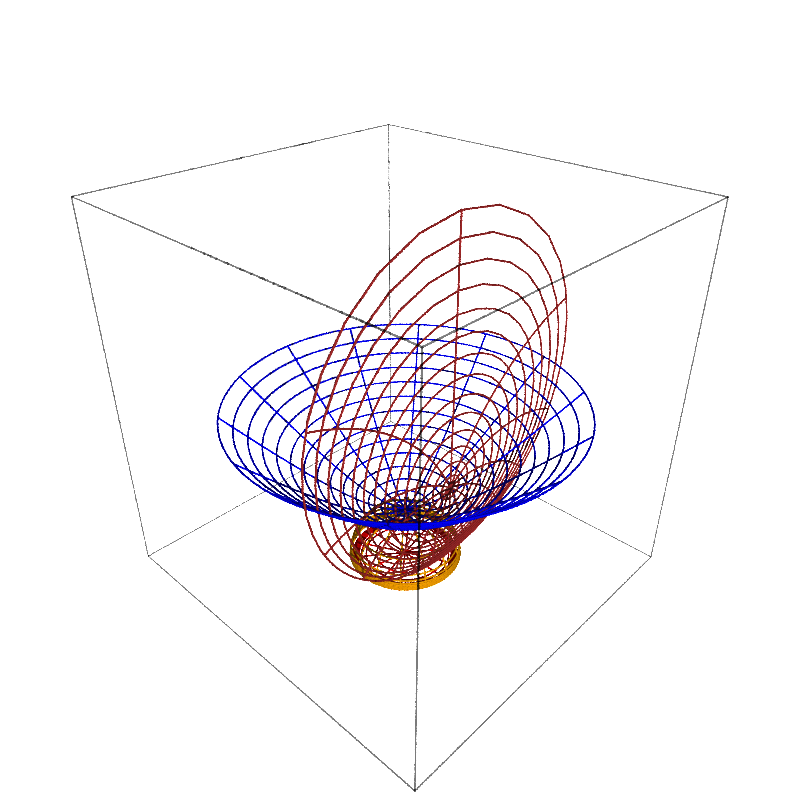

In [74]:
graph_hplane = X_pol.plot(X3, mapping=Phi4.restrict(U), ranges={r: (0, 1.5)}, nb_values=15, 
                          color='brown', label_axes=False)
show(graph_hyp + graph_Pdisk + graph_spher + graph_hplane, aspect_ratio=1, viewer=viewer3D,
     figsize=8)

Let us draw the grid of the hyperboloidal coordinates $(r,\varphi)$ in terms of the half-plane coordinates $(x,y)$:

In [75]:
pol_to_hplane = Pdisk_to_hplane * pol_to_Pdisk

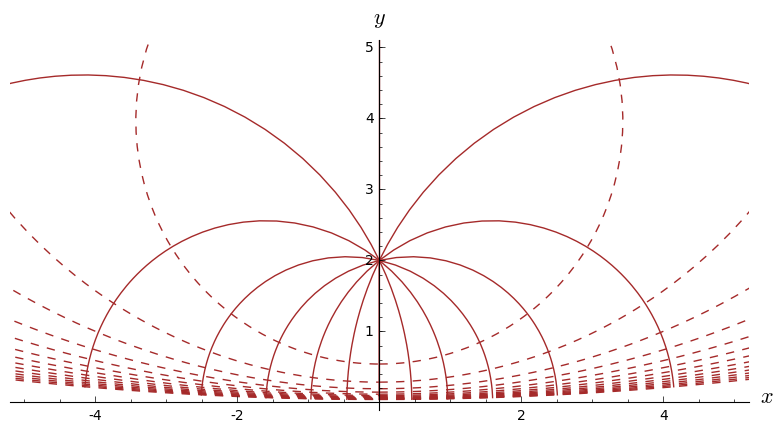

In [76]:
show(X_pol.plot(X_hplane, ranges={r: (0,24)}, style={r: '-', ph: '--'}, nb_values=15, 
                plot_points=200, color='brown'), xmin=-5, xmax=5, ymin=0, ymax=5, aspect_ratio=1)

The solid curves are those along which $r$ varies while $\varphi$ is kept constant. Conversely, the dashed curves are those along which $\varphi$ varies, while $r$ is kept constant. We notice that the former curves are arcs of circles orthogonal to the half-plane boundary $y=0$, hence they are geodesics of $(\mathbb{H}^2,g)$. This is not surprising since they correspond to the intersections of the hyperboloid with planes through the origin (namely the plane $\varphi=\mathrm{const}$). The point $(x,y) = (0,2)$ corresponds to $r=0$.

We may also depict the Poincaré disk coordinates $(u,v)$ in terms of the half-plane coordinates $(x,y)$:

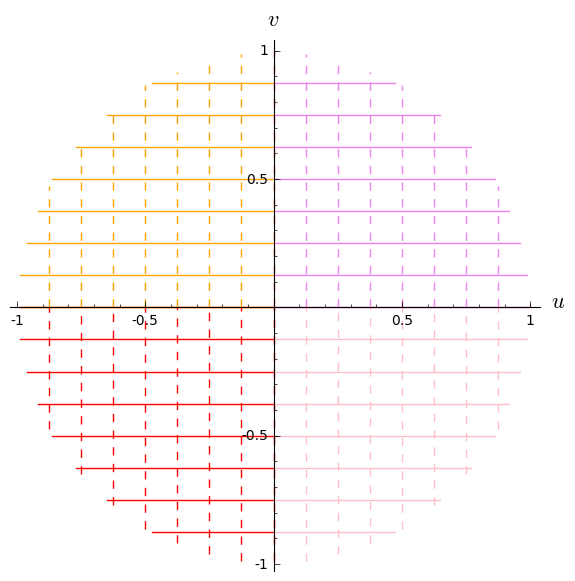

In [77]:
X_Pdisk_cart.plot(ranges={u: (-1, 0), v: (-1, 0)}, 
                  style={u: '-', v: '--'}) + \
X_Pdisk_cart.plot(ranges={u: (-1, 0), v: (0., 1)}, 
                  style={u: '-', v: '--'}, color='orange') + \
X_Pdisk_cart.plot(ranges={u: (0, 1), v: (-1, 0)}, 
                    style={u: '-', v: '--'}, color='pink') + \
X_Pdisk_cart.plot(ranges={u: (0, 1), v: (0, 1)}, 
                  style={u: '-', v: '--'}, color='violet')

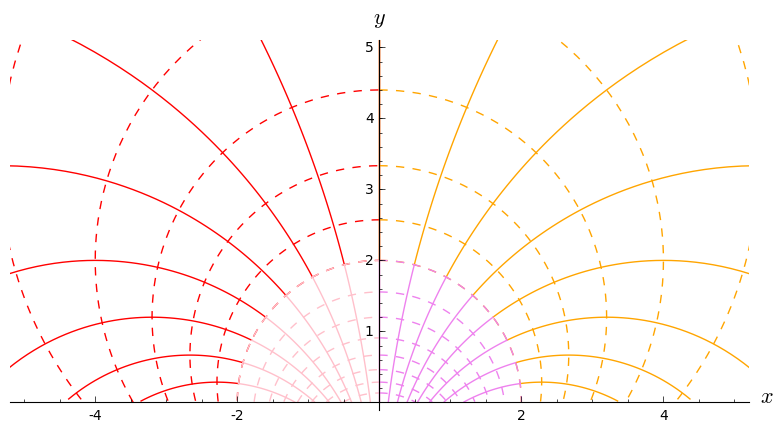

In [78]:
show(X_Pdisk_cart.plot(X_hplane, ranges={u: (-1, 0), v: (-1, 0)}, 
                       style={u: '-', v: '--'}) + \
     X_Pdisk_cart.plot(X_hplane, ranges={u: (-1, 0), v: (0, 1)}, 
                       style={u: '-', v: '--'}, color='orange') + \
     X_Pdisk_cart.plot(X_hplane, ranges={u: (0, 1), v: (-1, 0)}, 
                       style={u: '-', v: '--'}, color='pink') + \
     X_Pdisk_cart.plot(X_hplane, ranges={u: (0, 1), v: (0, 1)}, 
                       style={u: '-', v: '--'}, color='violet'),
     xmin=-5, xmax=5, ymin=0, ymax=5, aspect_ratio=1)

The expression of the metric tensor in the half-plane coordinates $(x,y)$ is

In [79]:
g.display(X_hplane.frame(), X_hplane)

g = y^(-2) dx*dx + y^(-2) dy*dy

## Summary

9 charts have been defined on $\mathbb{H}^2$:

In [80]:
H2.atlas()

[Chart (H2, (X, Y)),
 Chart (U, (X, Y)),
 Chart (U, (r, ph)),
 Chart (U, (R, ph)),
 Chart (H2, (u, v)),
 Chart (U, (u, v)),
 Chart (U, (th, ph)),
 Chart (H2, (x, y)),
 Chart (U, (x, y))]

There are actually 6 main charts, the other ones being subcharts:

In [81]:
H2.top_charts()

[Chart (H2, (X, Y)),
 Chart (U, (r, ph)),
 Chart (U, (R, ph)),
 Chart (H2, (u, v)),
 Chart (U, (th, ph)),
 Chart (H2, (x, y))]

The expression of the metric tensor in each of these charts is

In [82]:
for chart in H2.top_charts():
    show(g.display(chart.frame(), chart))

g = (Y^2 + 1)/(X^2 + Y^2 + 1) dX*dX - X*Y/(X^2 + Y^2 + 1) dX*dY - X*Y/(X^2 + Y^2 + 1) dY*dX + (X^2 + 1)/(X^2 + Y^2 + 1) dY*dY

g = 1/(r^2 + 1) dr*dr + r^2 dph*dph

g = 4/((R + 1)^2*(R - 1)^2) dR*dR + 4*R^2/((R + 1)^2*(R - 1)^2) dph*dph

g = 4/(u^2 + v^2 - 1)^2 du*du + 4/(u^2 + v^2 - 1)^2 dv*dv

g = cos(th)^(-2) dth*dth + sin(th)^2/cos(th)^2 dph*dph

g = y^(-2) dx*dx + y^(-2) dy*dy

For each of these charts, the non-vanishing (and non-redundant w.r.t. the symmetry on the last 2 indices) **Christoffel symbols of $g$** are

In [83]:
for chart in H2.top_charts():
    show(chart)
    show(g.christoffel_symbols_display(chart=chart))

Chart (H2, (X, Y))

Gam^X_XX = -(X*Y^2 + X)/(X^2 + Y^2 + 1) 
Gam^X_XY = X^2*Y/(X^2 + Y^2 + 1) 
Gam^X_YY = -(X^3 + X)/(X^2 + Y^2 + 1) 
Gam^Y_XX = -(Y^3 + Y)/(X^2 + Y^2 + 1) 
Gam^Y_XY = X*Y^2/(X^2 + Y^2 + 1) 
Gam^Y_YY = -(X^2 + 1)*Y/(X^2 + Y^2 + 1)

Chart (U, (r, ph))

Gam^r_r,r = -r/(r^2 + 1) 
Gam^r_ph,ph = -r^3 - r 
Gam^ph_r,ph = 1/r

Chart (U, (R, ph))

Gam^R_R,R = -2*R/(R^2 - 1) 
Gam^R_ph,ph = (R^3 + R)/(R^2 - 1) 
Gam^ph_R,ph = -(R^2 + 1)/(R^3 - R)

Chart (H2, (u, v))

Gam^u_uu = -2*u/(u^2 + v^2 - 1) 
Gam^u_uv = -2*v/(u^2 + v^2 - 1) 
Gam^u_vv = 2*u/(u^2 + v^2 - 1) 
Gam^v_uu = 2*v/(u^2 + v^2 - 1) 
Gam^v_uv = -2*u/(u^2 + v^2 - 1) 
Gam^v_vv = -2*v/(u^2 + v^2 - 1)

Chart (U, (th, ph))

Gam^th_th,th = sin(th)/cos(th) 
Gam^th_ph,ph = -sin(th)/cos(th) 
Gam^ph_th,ph = 1/(cos(th)*sin(th))

Chart (H2, (x, y))

Gam^x_xy = -1/y 
Gam^y_xx = 1/y 
Gam^y_yy = -1/y